In [1]:
#
# Create a classifier for digits '1' and '0'
# Traing with a CNN
# Shift the digit '1' to the left and to the right
# Evaluate the model with shifted images
# Conclusion
# Author: Luis A. Mateos

import os
path_base = '/Users/Lugo/Documents/' # /Users/L/Documents/imnist101/1
train_zero_dir = os.path.join(path_base+'imnist101/0')
train_one_dir = os.path.join(path_base+'imnist101/1')

train_zero_names = os.listdir(train_zero_dir)
#print(train_zero_names[0])
train_one_names = os.listdir(train_one_dir)
#print(train_one_names[0])

print("total training zero images: ", len(os.listdir(train_zero_dir)))
print("total training one images: ", len(os.listdir(train_one_dir)))

total training zero images:  4132
total training one images:  4684


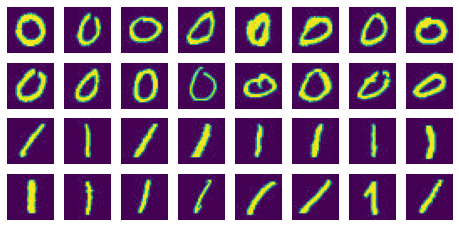

In [2]:
#
# Visualize some of the training images
#
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 8,8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 16
next_zero_pix = [os.path.join(train_zero_dir, fname)
                for fname in train_zero_names[pic_index-16:pic_index]]
next_one_pix = [os.path.join(train_one_dir, fname)
                for fname in train_one_names[pic_index-16:pic_index]]

for i, img_path in enumerate(next_zero_pix + next_one_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [3]:
#
# NN
#

import tensorflow as tf
print(tf.__version__)

#model
'''
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(64, activation='relu'),
                                   tf.keras.layers.Dense(64, activation='relu'),
                                   tf.keras.layers.Dense(128, activation='relu'),
                                   tf.keras.layers.Dense(1, activation='sigmoid')])
'''
#model
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                tf.keras.layers.MaxPool2D(2,2),
                                tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                tf.keras.layers.MaxPool2D(2,2),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(128, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')])

#compile
model.compile(optimizer = 'adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#loss='categorical_crossentropy',

2.8.0


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(path_base+'imnist101/',
                                                    target_size=(28,28),
                                                    batch_size=64,
                                                    class_mode='binary')
#class_mode='categorical')

Found 8816 images belonging to 2 classes.


In [5]:
history = model.fit(train_generator,
                   steps_per_epoch=8,
                   epochs=5,
                   verbose=2)

Epoch 1/5
8/8 - 3s - loss: 0.2839 - accuracy: 0.9043 - 3s/epoch - 343ms/step
Epoch 2/5
8/8 - 2s - loss: 0.0256 - accuracy: 0.9922 - 2s/epoch - 218ms/step
Epoch 3/5
8/8 - 2s - loss: 0.0209 - accuracy: 0.9980 - 2s/epoch - 229ms/step
Epoch 4/5
8/8 - 2s - loss: 0.0093 - accuracy: 0.9980 - 2s/epoch - 206ms/step
Epoch 5/5
8/8 - 2s - loss: 0.0500 - accuracy: 0.9902 - 2s/epoch - 209ms/step


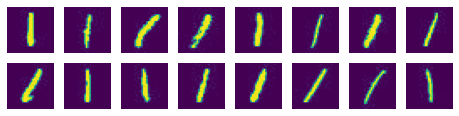

[1.] imnist/1/img_118.jpg
[1.] imnist/1/img_12.jpg
[1.] imnist/1/img_124.jpg
[1.] imnist/1/img_134.jpg
[1.] imnist/1/img_140.jpg
[1.] imnist/1/img_15.jpg
[1.] imnist/1/img_152.jpg
[1.] imnist/1/img_182.jpg
[1.] imnist/1/img_185.jpg
[1.] imnist/1/img_2.jpg
[1.] imnist/1/img_209.jpg
[1.] imnist/1/img_221.jpg
[1.] imnist/1/img_224.jpg
[1.] imnist/1/img_249.jpg
[1.] imnist/1/img_255.jpg
[1.] imnist/1/img_256.jpg
[1.] imnist/1/img_257.jpg
[1.] imnist/1/img_281.jpg
[1.] imnist/1/img_295.jpg
[1.] imnist/1/img_335.jpg
[1.] imnist/1/img_342.jpg
[1.] imnist/1/img_35.jpg
[1.] imnist/1/img_37.jpg
[1.] imnist/1/img_371.jpg
[1.] imnist/1/img_38.jpg
[1.] imnist/1/img_380.jpg
[1.] imnist/1/img_388.jpg
[1.] imnist/1/img_400.jpg
[1.] imnist/1/img_401.jpg
[1.] imnist/1/img_41.jpg
[1.] imnist/1/img_424.jpg
[1.] imnist/1/img_426.jpg
[1.] imnist/1/img_451.jpg
[1.] imnist/1/img_468.jpg
[1.] imnist/1/img_476.jpg
[1.] imnist/1/img_480.jpg
[1.] imnist/1/img_484.jpg
[1.] imnist/1/img_491.jpg
[1.] imnist/1/img_49

In [6]:
import numpy as np
import os
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing import image

#
# Evaluate test images with ONEs
#
paths = []
path = path_base+'imnist/1/'

# setting the pahts to look for the images
one_names = os.listdir(path)

# show some images from '0'
nrows, ncols = 8,8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 16
next_one__pix = [os.path.join(path, fname)
                for fname in one_names[pic_index-16:pic_index]]

for i, img_path in enumerate(next_one__pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()


for f in os.listdir(path):
    paths.append(os.path.join(path,f))
    
from skimage import io

for path in paths:
    img = image.load_img(path, target_size=(28,28))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    path_dir = path.split("Documents/")
    print(classes[0], path_dir[1])

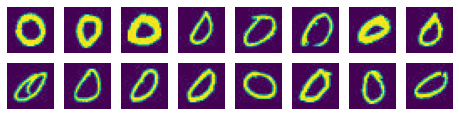

[0.] imnist/0/img_1.jpg
[0.] imnist/0/img_108.jpg
[0.] imnist/0/img_110.jpg
[0.] imnist/0/img_111.jpg
[0.] imnist/0/img_114.jpg
[0.] imnist/0/img_129.jpg
[0.] imnist/0/img_141.jpg
[0.] imnist/0/img_146.jpg
[0.] imnist/0/img_149.jpg
[0.] imnist/0/img_153.jpg
[0.] imnist/0/img_157.jpg
[0.] imnist/0/img_17.jpg
[0.] imnist/0/img_183.jpg
[0.] imnist/0/img_188.jpg
[0.] imnist/0/img_193.jpg
[0.] imnist/0/img_195.jpg
[0.] imnist/0/img_196.jpg
[0.] imnist/0/img_200.jpg
[0.] imnist/0/img_201.jpg
[0.] imnist/0/img_203.jpg
[0.] imnist/0/img_204.jpg
[0.] imnist/0/img_23.jpg
[0.] imnist/0/img_248.jpg
[0.] imnist/0/img_251.jpg
[0.] imnist/0/img_260.jpg
[0.] imnist/0/img_264.jpg
[0.] imnist/0/img_267.jpg
[0.] imnist/0/img_272.jpg
[0.] imnist/0/img_273.jpg
[0.] imnist/0/img_276.jpg
[0.] imnist/0/img_279.jpg
[0.] imnist/0/img_285.jpg
[0.] imnist/0/img_286.jpg
[0.] imnist/0/img_288.jpg
[0.] imnist/0/img_292.jpg
[0.] imnist/0/img_322.jpg
[0.] imnist/0/img_327.jpg
[0.] imnist/0/img_344.jpg
[0.] imnist/0/im

In [7]:
#
# Evaluate test images with ZEROs
#
paths = []
path = path_base+'imnist/0/'

# setting the pahts to look for the images
zero_names = os.listdir(path)

# show some images from '0'
nrows, ncols = 8,8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 16
next_zero__pix = [os.path.join(path, fname)
                for fname in zero_names[pic_index-16:pic_index]]

for i, img_path in enumerate(next_zero__pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()


for f in os.listdir(path):
    paths.append(os.path.join(path,f))
    
from skimage import io

for path in paths:
    img = image.load_img(path, target_size=(28,28))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    path_dir = path.split("Documents/")
    print(classes[0], path_dir[1])

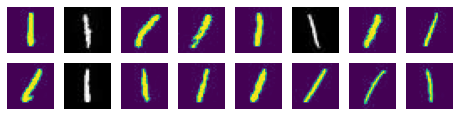

[1.] i1/img_118.jpg
[1.] i1/img_12.jpg
[1.] i1/img_124.jpg
[1.] i1/img_134.jpg
[1.] i1/img_140.jpg
[1.] i1/img_15.jpg
[1.] i1/img_152.jpg
[1.] i1/img_182.jpg
[1.] i1/img_185.jpg
[1.] i1/img_2.jpg
[1.] i1/img_209.jpg
[1.] i1/img_221.jpg
[1.] i1/img_224.jpg
[1.] i1/img_249.jpg
[1.] i1/img_255.jpg
[1.] i1/img_256.jpg
[1.] i1/img_257.jpg
[1.] i1/img_281.jpg
[1.] i1/img_295.jpg
[1.] i1/img_335.jpg
[1.] i1/img_342.jpg
[1.] i1/img_35.jpg
[1.] i1/img_37.jpg
[1.] i1/img_371.jpg
[1.] i1/img_38.jpg
[1.] i1/img_380.jpg
[1.] i1/img_388.jpg
[1.] i1/img_400.jpg
[1.] i1/img_401.jpg
[1.] i1/img_41.jpg
[1.] i1/img_424.jpg
[1.] i1/img_426.jpg
[1.] i1/img_451.jpg
[1.] i1/img_468.jpg
[1.] i1/img_476.jpg
[1.] i1/img_480.jpg
[1.] i1/img_484.jpg
[1.] i1/img_491.jpg
[1.] i1/img_495.jpg
[1.] i1/img_497.jpg
[1.] i1/img_52.jpg
[1.] i1/img_522.jpg
[1.] i1/img_527.jpg
[1.] i1/img_529.jpg
[1.] i1/img_540.jpg
[1.] i1/img_544.jpg
[1.] i1/img_549.jpg
[1.] i1/img_584.jpg
[1.] i1/img_59.jpg
[1.] i1/img_590.jpg
[1.] i1/im

In [8]:
#
# ONEs centered
#
paths = []
path = path_base+'i1/'

# setting the pahts to look for the images
one_left_names = os.listdir(path)

# show some images from shifting the '1' to the left and to the right
nrows, ncols = 8,8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 16
next_one_left_pix = [os.path.join(path, fname)
                for fname in one_left_names[pic_index-16:pic_index]]

for i, img_path in enumerate(next_one_left_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

# Evaluate all the test images with the ONE shifted to the left
for f in os.listdir(path):
    paths.append(os.path.join(path,f))
    
from skimage import io

for path in paths:
    img = image.load_img(path, target_size=(28,28))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    path_dir = path.split("Documents/")
    print(classes[0], path_dir[1])

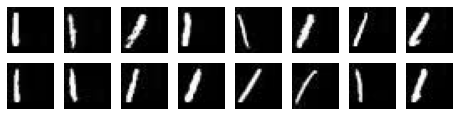

[0.] sl1/img_118.jpg
[0.] sl1/img_12.jpg
[0.] sl1/img_134.jpg
[0.] sl1/img_140.jpg
[0.] sl1/img_15.jpg
[0.] sl1/img_152.jpg
[0.] sl1/img_182.jpg
[0.] sl1/img_185.jpg
[0.] sl1/img_2.jpg
[0.] sl1/img_209.jpg
[0.] sl1/img_221.jpg
[0.] sl1/img_224.jpg
[0.] sl1/img_249.jpg
[0.] sl1/img_255.jpg
[0.] sl1/img_256.jpg
[0.] sl1/img_257.jpg
[0.] sl1/img_281.jpg
[0.] sl1/img_295.jpg
[0.] sl1/img_335.jpg
[0.] sl1/img_342.jpg
[0.] sl1/img_35.jpg
[0.] sl1/img_37.jpg
[0.] sl1/img_371.jpg
[0.] sl1/img_38.jpg
[0.] sl1/img_380.jpg
[0.] sl1/img_388.jpg
[0.] sl1/img_400.jpg
[0.] sl1/img_401.jpg
[0.] sl1/img_41.jpg
[0.] sl1/img_424.jpg
[0.] sl1/img_426.jpg
[0.] sl1/img_451.jpg
[0.] sl1/img_468.jpg
[0.] sl1/img_476.jpg
[0.] sl1/img_480.jpg
[0.] sl1/img_484.jpg
[0.] sl1/img_491.jpg
[0.] sl1/img_495.jpg
[0.] sl1/img_497.jpg
[0.] sl1/img_52.jpg
[0.] sl1/img_522.jpg
[0.] sl1/img_527.jpg
[0.] sl1/img_529.jpg
[0.] sl1/img_540.jpg
[0.] sl1/img_544.jpg
[0.] sl1/img_549.jpg
[0.] sl1/img_584.jpg
[0.] sl1/img_59.jpg
[0

In [9]:
#
# ONEs shifted to the left
#
paths = []
path = path_base+'sl1/'

# setting the pahts to look for the images
one_left_names = os.listdir(path)

# show some images from shifting the '1' to the left and to the right
nrows, ncols = 8,8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 16
next_one_left_pix = [os.path.join(path, fname)
                for fname in one_left_names[pic_index-16:pic_index]]

for i, img_path in enumerate(next_one_left_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

# Evaluate all the test images with the ONE shifted to the left
for f in os.listdir(path):
    paths.append(os.path.join(path,f))
    
from skimage import io

for path in paths:
    img = image.load_img(path, target_size=(28,28))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    path_dir = path.split("Documents/")
    print(classes[0], path_dir[1])

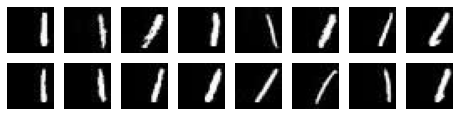

[0.] sr1/img_118.jpg
[0.] sr1/img_12.jpg
[0.] sr1/img_134.jpg
[0.] sr1/img_140.jpg
[0.] sr1/img_15.jpg
[0.] sr1/img_152.jpg
[0.] sr1/img_182.jpg
[0.] sr1/img_185.jpg
[0.] sr1/img_2.jpg
[0.] sr1/img_209.jpg
[0.] sr1/img_221.jpg
[0.] sr1/img_224.jpg
[0.] sr1/img_249.jpg
[0.] sr1/img_255.jpg
[0.] sr1/img_256.jpg
[0.] sr1/img_257.jpg
[0.] sr1/img_281.jpg
[0.] sr1/img_295.jpg
[0.] sr1/img_335.jpg
[0.] sr1/img_342.jpg
[0.] sr1/img_35.jpg
[0.] sr1/img_37.jpg
[0.] sr1/img_371.jpg
[0.] sr1/img_38.jpg
[0.] sr1/img_380.jpg
[0.] sr1/img_388.jpg
[0.] sr1/img_400.jpg
[0.] sr1/img_401.jpg
[0.] sr1/img_41.jpg
[0.] sr1/img_424.jpg
[0.] sr1/img_426.jpg
[0.] sr1/img_451.jpg
[0.] sr1/img_468.jpg
[0.] sr1/img_476.jpg
[0.] sr1/img_480.jpg
[0.] sr1/img_484.jpg
[0.] sr1/img_491.jpg
[0.] sr1/img_495.jpg
[0.] sr1/img_497.jpg
[0.] sr1/img_52.jpg
[0.] sr1/img_522.jpg
[0.] sr1/img_527.jpg
[0.] sr1/img_529.jpg
[0.] sr1/img_540.jpg
[0.] sr1/img_544.jpg
[0.] sr1/img_549.jpg
[0.] sr1/img_584.jpg
[0.] sr1/img_59.jpg
[0

In [10]:
#
# ONEs shifted to the right
#
paths = []
path = path_base+'sr1/'

# setting the pahts to look for the images
one_right_names = os.listdir(path)

# show some images from shifting the '1' to the left and to the right
nrows, ncols = 8,8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 16
next_one_right_pix = [os.path.join(path, fname)
                for fname in one_right_names[pic_index-16:pic_index]]

for i, img_path in enumerate(next_one_right_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

# Evaluate all the test images with the ONE shifted to the right 
for f in os.listdir(path):
    paths.append(os.path.join(path,f))
    
from skimage import io

for path in paths:
    img = image.load_img(path, target_size=(28,28))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    path_dir = path.split("Documents/")
    print(classes[0], path_dir[1])

[0.]


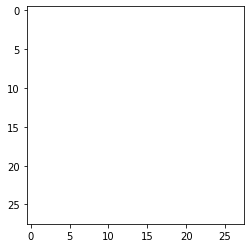

In [11]:
#
# A white image is 100% sure that is a ZERO
#
path = path_base+'x/img_white.jpg'

img = mpimg.imread(path)
plt.imshow(img)

img = image.load_img(path, target_size=(28,28))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])